In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pylab import plt
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import seaborn as sns 
sns.set(font_scale = 1.3)
sns.set_style("white")
sns.set_style("ticks", {"xtick.major.size": 6, "ytick.major.size": 0})

# Read in data

In [3]:
predictions_SP = pd.read_csv('Predictions/Swissprot/all_predictions.csv')
predictions_pos = pd.read_csv('Predictions/ext_pos/all_predictions.csv')
predictions_neg = pd.read_csv('Predictions/ext_neg/all_predictions.csv')
predictions_SP['DeePhase'] = predictions_SP['prediction_phys_multi']+ predictions_SP['prediction_w2v_multi'] 
predictions_pos['DeePhase'] = predictions_pos['prediction_phys_multi']+ predictions_pos['prediction_w2v_multi'] 
predictions_neg['DeePhase'] = predictions_neg['prediction_phys_multi']+ predictions_neg['prediction_w2v_multi'] 

# Performance on external dataset:

/Users/kadiliissaar/anaconda3/envs/prot/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kadiliissaar/anaconda3/envs/prot/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kadiliissaar/anaconda3/envs/prot/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

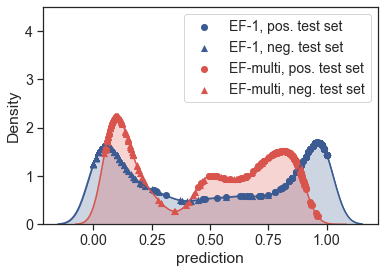

/Users/kadiliissaar/anaconda3/envs/prot/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kadiliissaar/anaconda3/envs/prot/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kadiliissaar/anaconda3/envs/prot/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

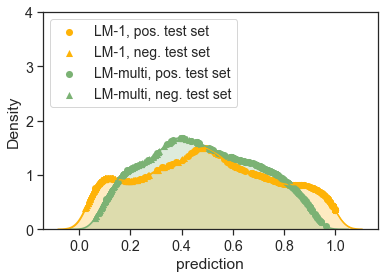

In [4]:
ax = sns.distplot(predictions_SP['prediction_phys_1'], hist = True, kde = True, rug = False, 
                 kde_kws = {'shade': True, 'linewidth': 1}, 
                 hist_kws= {'alpha' : 0, "linewidth": 1}, color = sns.xkcd_rgb['denim blue'])
ax = sns.distplot(predictions_SP['prediction_phys_multi'], hist = True, kde = True, rug = False,
                 kde_kws = {'shade': True, 'linewidth': 0.25}, 
                  hist_kws= {'alpha' : 0, "linewidth": 1.}, color = sns.xkcd_rgb['pale red'])

data_x1, data_y1 = sns.distplot(predictions_SP['prediction_phys_1'],  hist_kws= {'alpha' : 0, "linewidth": 0},
                              color = sns.xkcd_rgb['denim blue']).lines[0].get_data()
xi1_pos = predictions_pos['prediction_phys_1']
yi1_pos = np.interp(xi1_pos, data_x1, data_y1)
xi1_neg = predictions_neg['prediction_phys_1']
yi1_neg = np.interp(xi1_neg, data_x1, data_y1)

data_x3, data_y3 = sns.distplot(predictions_SP['prediction_phys_multi'], hist_kws= {'alpha' : 0, "linewidth": 0},
                             color = sns.xkcd_rgb['pale red']).lines[1].get_data()
xi3_pos = predictions_pos['prediction_phys_multi']
yi3_pos = np.interp(xi3_pos, data_x3, data_y3)
xi3_neg = predictions_neg['prediction_phys_multi']
yi3_neg = np.interp(xi3_neg, data_x3, data_y3)

plt.scatter(xi1_pos, yi1_pos, marker="o", linewidth = 0, s = 50, color = sns.xkcd_rgb['denim blue'], label = 'EF-1, pos. test set')
plt.scatter(xi1_neg, yi1_neg, marker="^", linewidth = 0, s = 50, color = sns.xkcd_rgb['denim blue'], label = 'EF-1, neg. test set')
plt.scatter(xi3_pos, yi3_pos, marker="o", linewidth = 0, s = 50, color = sns.xkcd_rgb['pale red'], label = 'EF-multi, pos. test set')
plt.scatter(xi3_neg, yi3_neg, marker="^", linewidth = 0, s = 50, color = sns.xkcd_rgb['pale red'], label = 'EF-multi, neg. test set')
plt.ylim([0, 4.5])
plt.xlabel('prediction')
plt.legend(loc = 1, fontsize = 14)
plt.show()


ax = sns.distplot(predictions_SP['prediction_w2v_1'], hist = True, kde = True, rug = False, 
                 kde_kws = {'shade': True, 'linewidth': 1}, 
                 hist_kws= {'alpha' : 0, "linewidth": 1}, color = sns.xkcd_rgb['amber'])
ax = sns.distplot(predictions_SP['prediction_w2v_multi'], hist = True, kde = True, rug = False,
                 kde_kws = {'shade': True, 'linewidth': 0.25}, 
                  hist_kws= {'alpha' : 0, "linewidth": 1.}, color = sns.xkcd_rgb['faded green'])

data_x1, data_y1 = sns.distplot(predictions_SP['prediction_w2v_1'],  hist_kws= {'alpha' : 0, "linewidth": 0},
                              color = sns.xkcd_rgb['amber']).lines[0].get_data()
xi1_pos = predictions_pos['prediction_w2v_1']
yi1_pos = np.interp(xi1_pos, data_x1, data_y1)
xi1_neg = predictions_neg['prediction_w2v_1']
yi1_neg = np.interp(xi1_neg, data_x1, data_y1)

data_x3, data_y3 = sns.distplot(predictions_SP['prediction_w2v_multi'], hist_kws= {'alpha' : 0, "linewidth": 0},
                             color = sns.xkcd_rgb['faded green']).lines[1].get_data()
xi3_pos = predictions_pos['prediction_w2v_multi']
yi3_pos = np.interp(xi3_pos, data_x3, data_y3)
xi3_neg = predictions_neg['prediction_w2v_multi']
yi3_neg = np.interp(xi3_neg, data_x3, data_y3)

plt.scatter(xi1_pos, yi1_pos, marker="o", linewidth = 0, s = 50, color = sns.xkcd_rgb['amber'], label = 'LM-1, pos. test set')
plt.scatter(xi1_neg, yi1_neg, marker="^", linewidth = 0, s = 50, color = sns.xkcd_rgb['amber'], label = 'LM-1, neg. test set')
plt.scatter(xi3_pos, yi3_pos, marker="o", linewidth = 0, s = 50, color = sns.xkcd_rgb['faded green'], label = 'LM-multi, pos. test set')
plt.scatter(xi3_neg, yi3_neg, marker="^", linewidth = 0, s = 50, color = sns.xkcd_rgb['faded green'], label = 'LM-multi, neg. test set')
plt.ylim([0, 4])
plt.xlabel('prediction')
plt.legend(loc = 2, fontsize = 14)
plt.show()


/Users/kadiliissaar/anaconda3/envs/prot/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kadiliissaar/anaconda3/envs/prot/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kadiliissaar/anaconda3/envs/prot/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

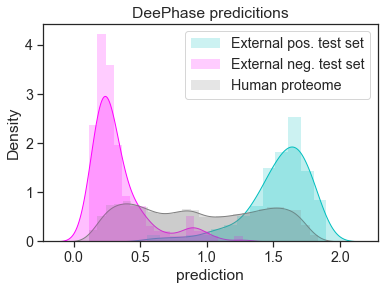

In [5]:
sns.distplot(predictions_pos['DeePhase'],  hist_kws= {'alpha' : 0.2, "linewidth": 0},
                              color = '#00BFBF',  kde_kws = {'shade': True, 'linewidth': 1},
             label = 'External pos. test set')
sns.distplot(predictions_neg['DeePhase'],  hist_kws= {'alpha' : 0.2, "linewidth": 0},
                              color = 'magenta',  kde_kws = {'shade': True, 'linewidth': 1},
             label = 'External neg. test set')
sns.distplot(predictions_SP['DeePhase'],  hist_kws= {'alpha' : 0.2, "linewidth": 0},
                              color = 'grey',  kde_kws = {'shade': True, 'linewidth': 1},
             label = 'Human proteome')
plt.xlabel('prediction')
plt.legend(loc = 1, ncol = 1)
plt.title('DeePhase predicitions')
plt.show()


In [68]:
#Task 1 - Performance compared to structured proteins

In [16]:
#ROC-curves

TH = np.arange(0, 1.0, 0.02)

def performance(TH, predictions, all_predictions):
    TP = []; FP = []
    for i in range(0, len(TH)):
        TP.append( len([k for k in predictions if k >= TH[i]]) / len(predictions))
        FP.append( (len([k for k in all_predictions if k >= TH[i]]) - len([k for k in predictions if k >= TH[i]]) ) /
                  (len(all_predictions) - len([k for k in predictions if k >= TH[i]])))
    return TP, FP

predictions_pos['label'] = 'pos'
predictions_neg['label']  = 'neg'
pos_neg_test = pd.concat([predictions_pos, predictions_neg], axis = 0)


PerformanceA1_M = performance(TH, predictions_pos['prediction_phys_1'], predictions_SP['prediction_phys_1'])
PerformanceAM_M = performance(TH, predictions_pos['prediction_phys_multi'], predictions_SP['prediction_phys_multi'])
PerformanceB1_M = performance(TH, predictions_pos['prediction_w2v_1'], predictions_SP['prediction_w2v_1'])
PerformanceBM_M = performance(TH, predictions_pos['prediction_w2v_multi'], predictions_SP['prediction_w2v_multi'])
PerformanceAB_M = performance(TH, predictions_pos['DeePhase'], predictions_SP['DeePhase'])

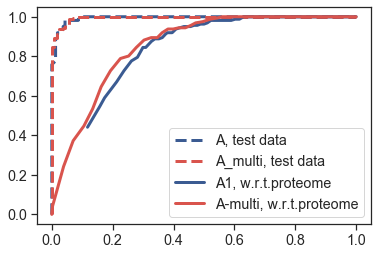

In [17]:
fpr, tpr, _ = metrics.roc_curve(pos_neg_test['label'],  pos_neg_test['prediction_phys_1'], pos_label = 'pos')
plt.plot(fpr,tpr, label = 'A, test data', color = sns.xkcd_rgb["denim blue"], linewidth = 3, linestyle = '--')
fpr, tpr, _ = metrics.roc_curve(pos_neg_test['label'],  pos_neg_test['prediction_phys_multi'], pos_label = 'pos')
plt.plot(fpr,tpr, label = 'A_multi, test data', color = sns.xkcd_rgb["pale red"], linewidth = 3, linestyle = '--')

plt.plot(PerformanceA1_M[1], PerformanceA1_M[0], sns.xkcd_rgb["denim blue"], label = 'A1, w.r.t.proteome', linewidth = 3)
plt.plot(PerformanceAM_M[1], PerformanceAM_M[0], color = sns.xkcd_rgb["pale red"], label = 'A-multi, w.r.t.proteome', linewidth = 3)
plt.legend()
plt.show()



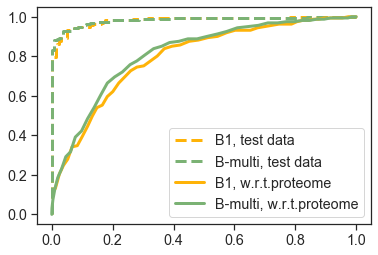

In [18]:

fpr, tpr, _ = metrics.roc_curve(pos_neg_test['label'],  pos_neg_test['prediction_w2v_1'], pos_label = 'pos')
plt.plot(fpr,tpr, label = 'B1, test data', color = sns.xkcd_rgb["amber"], linewidth = 3, linestyle = '--')
fpr, tpr, _ = metrics.roc_curve(pos_neg_test['label'],  pos_neg_test['prediction_w2v_1'], pos_label = 'pos')
fpr, tpr, _ = metrics.roc_curve(pos_neg_test['label'],  pos_neg_test['prediction_w2v_multi'], pos_label = 'pos')
plt.plot(fpr,tpr, label = 'B-multi, test data', color = sns.xkcd_rgb["faded green"], linewidth = 3, linestyle = '--')

plt.plot(PerformanceB1_M[1], PerformanceB1_M[0], sns.xkcd_rgb["amber"], label = 'B1, w.r.t.proteome', linewidth = 3)
plt.plot(PerformanceBM_M[1], PerformanceBM_M[0], color = sns.xkcd_rgb["faded green"], label = 'B-multi, w.r.t.proteome', linewidth = 3)
plt.legend()
plt.show()